# **Numerical Methods Assignment_2**


*   *Lakkoju Vikranth Ram* *ES23BTECH11024*
*   *Chilukala Jayanth Kumar Reddy* *CO23BTECH11005*
*   *Kowsith* *ES23BTECH11015*
*   *Sathwik* *ES23BTECH11020*
*   *Deepak Joy* *ES23BTECH11014*



In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre


$\mathbf{A)}$

${JACOBI}$                $ {MATRIX}$

$J = \begin{bmatrix}
\alpha_1 & \beta_1 & 0 & \cdots & 0 & 0 \\
\beta_1 & \alpha_2 & \beta_2 & \cdots & 0 & 0 \\
0 & \beta_2 & \ddots & \ddots & \vdots & \vdots \\
\vdots & \vdots & \ddots & \ddots & \beta_{N-2} & 0 \\
0 & 0 & \cdots & \beta_{N-2} & \alpha_{N-1} & \beta_{N-1} \\
0 & 0 & \cdots & 0 & \beta_{N-1} & \alpha_N \\
\end{bmatrix}$

$
\alpha_i = -\frac{b_i}{a_i}, \quad \beta_i = \left( \frac{c_{i+1}}{a_i a_{i+1}} \right)^{1/2}.
$

all $\alpha$ $'s$ are equal to 0 and $\beta$ $'s$ are taken in the code when compared to the actual legendre equation

In [53]:
def jacobi_matrix(n):
  beta = 0.5 / np.sqrt(1 - (2 * np.arange(1, n, dtype=float)) ** -2)
  J = np.diag(beta, -1) + np.diag(beta, 1)
  return J

### Constructing and displaying the Jacobi matrix.

In [54]:
n=int(input("Enter a number : "))
J=jacobi_matrix(n)
J

Enter a number : 32


array([[0.        , 0.57735027, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57735027, 0.        , 0.51639778, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51639778, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.50006946,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.50006946, 0.        ,
        0.50006505],
       [0.        , 0.        , 0.        , ..., 0.        , 0.50006505,
        0.        ]])

### Extracting Roots and Weights from the Jacobi Matrix

The eigenvalues of the Jacobi matrix represent the roots (nodes) for Gaussian quadrature.

$\text{weights} = 2 \times \left( \text{first element of corresponding eigenvectors} \right){^2.}$


In [57]:
def LU_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        for k in range(i, n):
            U[i][k] = A[i][k] - sum(L[i][j] * U[j][k] for j in range(i))
        for k in range(i, n):
            if i == k:
                L[i][i] = 1
            else:
                L[k][i] = (A[k][i] - sum
                 (L[k][j] * U[j][i] for j in range(i))) / U[i][i]
    return L, U

def eigen_values(A):
  n=len(A)
  count = 0
  temp = A.copy()
  while not np.all(np.diagonal(temp) != 0):
     temp = A + (count+1) * np.eye(n)
     count += 1
  eigen_values = np.zeros(n)
  while True:
      tolerance = 1e-9
      L,U=LU_decomposition(temp)
      temp = np.matmul(U, L)
      if np.all(abs(U-np.eye(n)) < tolerance):
        eigen_values = np.diag(L) - count
        break
      if np.all(abs(L-np.eye(n)) < tolerance):
        eigen_values = np.diag(U) - count
        break
  return eigen_values


In [58]:
import numpy as np
from scipy.linalg import null_space

def find_eigenvector(A, eigenvalue):

    shifted_matrix = A - eigenvalue * np.eye(A.shape[0])
    eigenvector = null_space(shifted_matrix)

    if eigenvector.size == 0:
        return None
    else:
        return eigenvector[:, 0] / np.linalg.norm(eigenvector[:, 0])

In [59]:
def weights_and_nodes(J):
  eigenvalues, eigenvectors = np.linalg.eigh(J)
  roots = eigenvalues
  weights = 2 * (eigenvectors[0, :]**2)
  return roots, weights

roots, weights = weights_and_nodes(J)
print("Roots:", roots)
print("Weights:", weights)


Roots: [-0.99726386 -0.98561151 -0.96476226 -0.93490608 -0.89632116 -0.84936761
 -0.7944838  -0.73218212 -0.66304427 -0.58771576 -0.50689991 -0.42135128
 -0.3318686  -0.23928736 -0.14447196 -0.04830767  0.04830767  0.14447196
  0.23928736  0.3318686   0.42135128  0.50689991  0.58771576  0.66304427
  0.73218212  0.7944838   0.84936761  0.89632116  0.93490608  0.96476226
  0.98561151  0.99726386]
Weights: [0.00701861 0.01627439 0.02539207 0.03427386 0.0428359  0.05099806
 0.05868409 0.06582222 0.07234579 0.0781939  0.08331192 0.08765209
 0.09117388 0.0938444  0.09563872 0.09654009 0.09654009 0.09563872
 0.0938444  0.09117388 0.08765209 0.08331192 0.0781939  0.07234579
 0.06582222 0.05868409 0.05099806 0.0428359  0.03427386 0.02539207
 0.01627439 0.00701861]


### Visualizing Gaussian Quadrature Nodes and Weights using the Jacobi matrix.

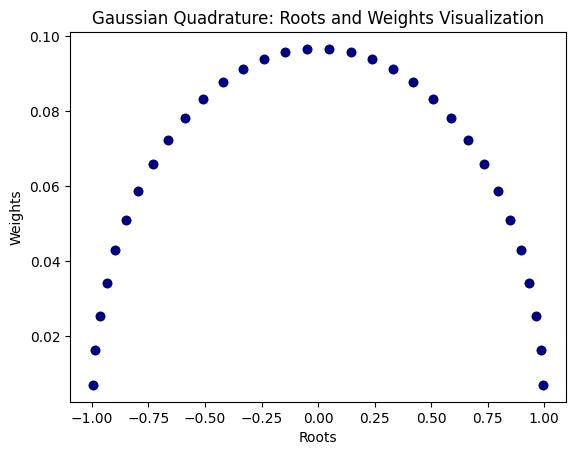

In [60]:
import matplotlib.pyplot as plt
import numpy as np

roots = np.asarray(roots)
weights = np.asarray(weights)

plt.scatter(roots, weights)

plt.xlabel('Roots')
plt.ylabel('Weights')
plt.title('Gaussian Quadrature: Roots and Weights Visualization')
plt.scatter(roots, weights, color='navy')
plt.show()

$\mathbf{B)}$

### Calculating Legendre Polynomials using Recurrence Relation

$
(2n+1)xP_{n}(x)=(n+1)P_{n+1}(x)+nP_{n-1}(x)
$

In [61]:
from sympy import symbols, expand, Poly

def legendre_polynomial(n):
    x = symbols('x')

    if n>16 :
        Pn = legendre(n)
        return Pn.coefficients

    if n == 0:
        return [1]
    elif n == 1:
        return [1, 0]

    P_n_minus_2 = 1
    P_n_minus_1 = x
    for k in range(2, n + 1):
        P_n = ((2 * k - 1) * x * P_n_minus_1 - (k - 1) * P_n_minus_2) / k
        P_n_minus_2 = P_n_minus_1
        P_n_minus_1 = P_n

    P_n_expanded = expand(P_n)
    coefficients = Poly(P_n_expanded, x).all_coeffs()
    coefficients = [float(c) for c in coefficients]
    return coefficients

coefficients = legendre_polynomial(n)
print(f"Coefficients of P_{n}(x):", coefficients)


Coefficients of P_32(x): [ 4.26691058e+08  5.68466685e-07 -3.35934547e+09 -1.44011560e-05
  1.19779941e+10 -9.48960386e-04 -2.55801230e+10 -6.32438136e-03
  3.64628947e+10 -1.01505411e-02 -3.65954870e+10 -3.29255904e-03
  2.65835141e+10 -3.15309521e-04 -1.41480888e+10 -1.08387648e-03
  5.52208566e+09 -3.94894857e-04 -1.56654912e+09 -4.24455125e-05
  3.16791045e+08 -1.24352087e-07 -4.42034016e+07  2.88674488e-07
  4.04299405e+06  7.12433833e-09 -2.23281723e+05 -5.05989939e-12
  6.46568696e+03  3.38832548e-14 -7.38935652e+01  2.20594107e-16
  1.39949934e-01]


In [64]:
import numpy as np

def companion_matrix(coeffs):
    if coeffs[0] != 1:
        coeffs = [c / coeffs[0] for c in coeffs]
    C = np.zeros((n, n))
    C[-1, :] = -np.flip(np.array(coeffs[1:]))
    for i in range(n - 1):
        C[i, i + 1] = 1
    return C

C = companion_matrix(coefficients)
print("Companion Matrix:\n", C)


Companion Matrix:
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-3.27988908e-10 -5.16987883e-25  1.73178143e-07 ...  3.37507799e-14
   7.87301587e+00 -1.33226763e-15]]


### Computing Polynomial Roots using Companion Matrix Eigenvalues

In [65]:
roots_found =np.sort(np.linalg.eigvals(C))
roots_found

array([-0.99707258, -0.98610292, -0.9641756 , -0.93536331, -0.89607548,
       -0.84946612, -0.79445479, -0.73218854, -0.66304319, -0.58771589,
       -0.5068999 , -0.42135128, -0.3318686 , -0.23928736, -0.14447196,
       -0.04830767,  0.04830767,  0.14447196,  0.23928736,  0.3318686 ,
        0.42135128,  0.50689991,  0.58771576,  0.66304427,  0.73218211,
        0.79448383,  0.84936753,  0.89632134,  0.93490577,  0.96476263,
        0.98561121,  0.99726397])

This section computes the weights for Gaussian quadrature using Lagrangian interpolation based on the previously calculated roots. The weights are then scaled to ensure their sum equals 2, a requirement for Gaussian quadrature.

In [66]:
import numpy as np

def compute_weights(roots):
    n = len(roots)
    weights = np.zeros(n)

    for i in range(n):
        prod = 1
        for j in range(n):
            if i != j:
                prod *= (roots[i] - roots[j])
        weights[i] = 2 / ((1 - roots[i]**2) * (prod**2))
    weights =2* weights / np.sum(weights)
    return weights

weights_found = compute_weights(roots_found)
print(weights)

[0.00701861 0.01627439 0.02539207 0.03427386 0.0428359  0.05099806
 0.05868409 0.06582222 0.07234579 0.0781939  0.08331192 0.08765209
 0.09117388 0.0938444  0.09563872 0.09654009 0.09654009 0.09563872
 0.0938444  0.09117388 0.08765209 0.08331192 0.0781939  0.07234579
 0.06582222 0.05868409 0.05099806 0.0428359  0.03427386 0.02539207
 0.01627439 0.00701861]


Here, we plot the graph between weights found using Lagrange interpolation and roots found using the eigenvalues of the companion matrix.

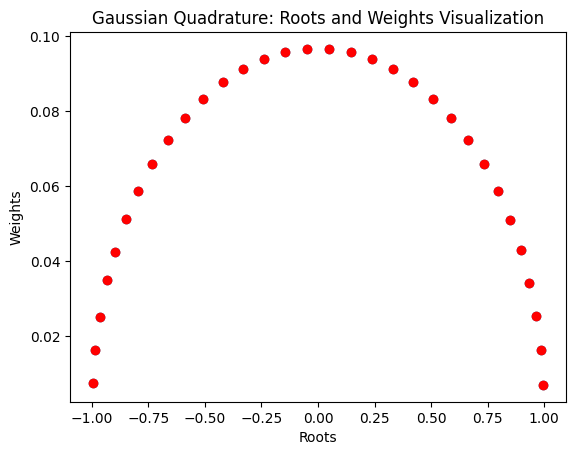

In [67]:

roots = np.asarray(roots_found)
weights = np.asarray(weights_found)

plt.scatter(roots, weights)

plt.xlabel('Roots')
plt.ylabel('Weights')
plt.title('Gaussian Quadrature: Roots and Weights Visualization')
plt.scatter(roots, weights, color='red')
plt.show()

